Que. 2

Perform K-Means,Hierarchical and DBSCAN Clustering for the crime_data.csv data and identify the number of clusters formed and Visualise the results.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [2]:
df= pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#### Understanding the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### EDA

#### Handling NA values

In [5]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

#### Balancing 

No need to balance as this is a clustering problem

#### Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [7]:
encoder.fit(df['Unnamed: 0'])

LabelEncoder()

In [8]:
encoder.classes_

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [9]:
df['Unnamed: 0'] = encoder.transform(df['Unnamed: 0'])

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


#### Scaling

<Axes: >

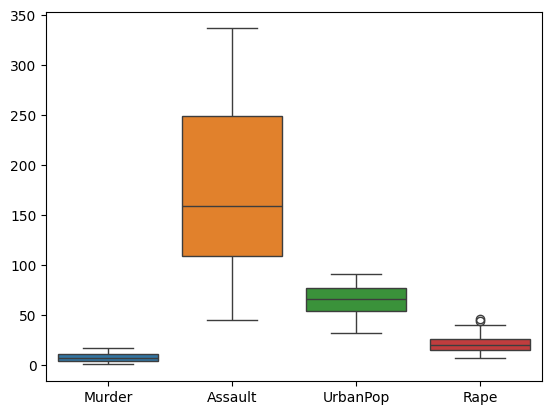

In [14]:
sns.boxplot(df)

In [15]:
from sklearn.preprocessing import StandardScaler

#create an object of standard scaler
scaler = StandardScaler()

#fit the data inot the scaler object
# fit mehthod requires a 2d collection (DF)
scaler.fit(df)

StandardScaler()

In [16]:
array_scaled = scaler.transform(df)
array_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [18]:
df_scaled = pd.DataFrame(array_scaled, columns=["Murder","Assault","UrbanPop","Rape"])
df_scaled

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [19]:
df= df_scaled

<Axes: >

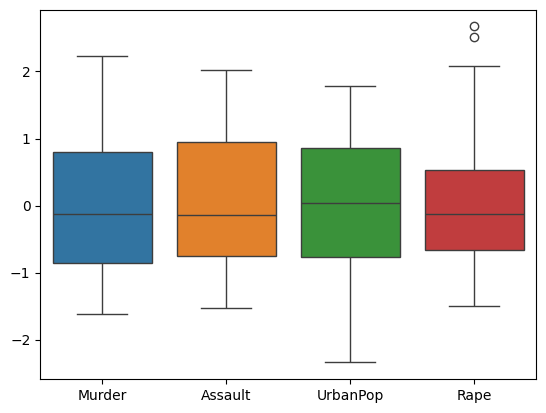

In [20]:
sns.boxplot(df)

## Model Building

### KMean Clustering

In [21]:
from sklearn.cluster import KMeans

# create an object
kmeans = KMeans(n_clusters=4, random_state=123456)

# fit the data
kmeans.fit(df)

KMeans(n_clusters=4, random_state=123456)

In [22]:
# get clusters
kmeans.labels_

array([3, 3, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 0, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [23]:
# get centroids
kmeans.cluster_centers_

array([[-0.549972  , -0.45634975,  0.50510391, -0.30123345],
       [ 0.71788585,  1.04432228,  0.89281033,  1.18827715],
       [-0.96708598, -1.13648381, -1.09083666, -1.04566193],
       [ 1.32475684,  0.90930557, -0.86737678,  0.29612861]])

In [24]:
df['category'] = kmeans.labels_

In [25]:
df.head()

,Murder,Assault,UrbanPop,Rape,category
0,1.255179,0.790787,-0.526195,-0.003451,3
1,0.513019,1.118060,-1.224067,2.509424,3
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,3
4,0.281093,1.275635,1.776781,2.088814,1


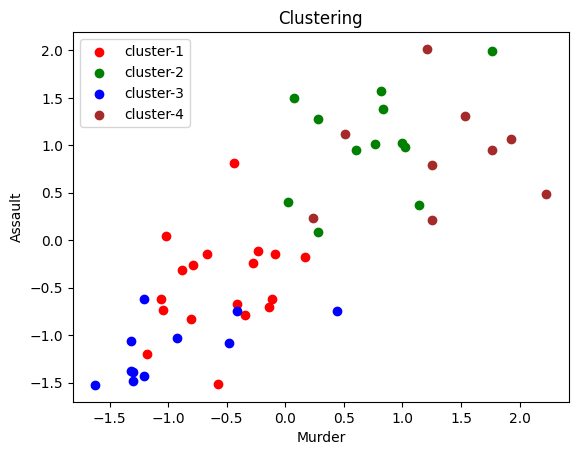

In [26]:
colors = ["red", "green", "blue", "brown", "magenta"]

for cluster_index in range(4):
    plt.scatter(df['Murder'][kmeans.labels_ == cluster_index],
                df['Assault'][kmeans.labels_ == cluster_index],
               color=colors[cluster_index], label=f"cluster-{cluster_index + 1}")
plt.xlabel("Murder")
plt.ylabel("Assault")
plt.title("Clustering")
plt.legend()


#### Elbow method

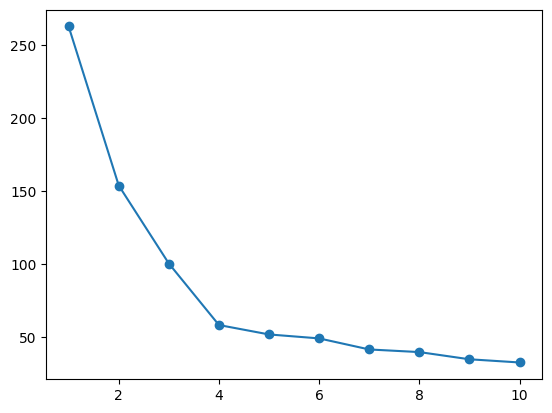

In [27]:
# collect all WSS for different clusters
wss = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    wss.append(kmeans.inertia_)

# plot the chart
x = np.arange(1, 11)
plt.scatter(x, wss)
plt.plot(x, wss)

### Hierarchical

In [28]:
from sklearn.cluster import AgglomerativeClustering

# create an object 
agglomerative = AgglomerativeClustering(n_clusters=4)

# fit the data
agglomerative.fit(df)

AgglomerativeClustering(n_clusters=4)

In [29]:
agglomerative.labels_

array([0, 0, 3, 1, 3, 3, 2, 2, 3, 0, 2, 1, 3, 2, 1, 2, 1, 0, 1, 3, 2, 3,
       2, 0, 3, 1, 2, 3, 1, 2, 3, 3, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 3, 2,
       1, 2, 2, 1, 1, 2], dtype=int64)

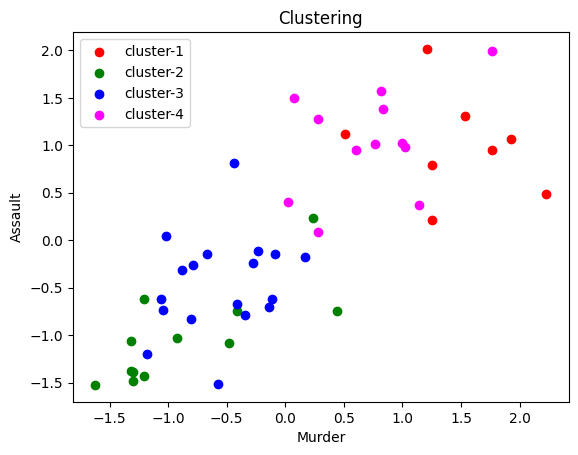

In [30]:
colors = ["red", "green", "blue", "magenta","brown"]

for cluster_index in range(4):
    plt.scatter(df['Murder'][agglomerative.labels_ == cluster_index],
                df['Assault'][agglomerative.labels_ == cluster_index],
               color=colors[cluster_index], label=f"cluster-{cluster_index + 1}")
plt.xlabel("Murder")
plt.ylabel("Assault")
plt.title("Clustering")
plt.legend()


#### Dendrogram 

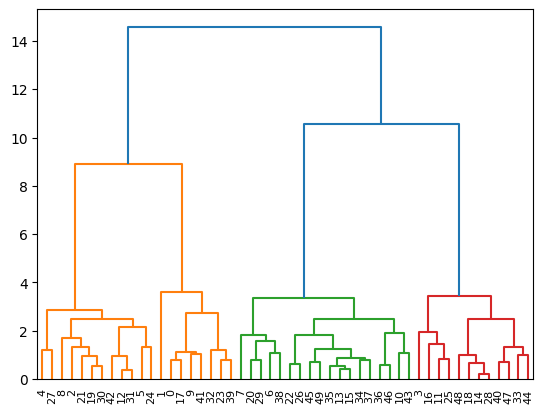

In [31]:
from scipy.cluster import hierarchy

# create linkage
linkage = hierarchy.linkage(df, method='ward')

# render a dendrogram
dendrogram = hierarchy.dendrogram(linkage, orientation='top')

### Clustering

In [32]:
from sklearn.cluster import DBSCAN

# create an object
dbscan = DBSCAN(eps=2, min_samples=12)

# fit the data
dbscan.fit(df)

DBSCAN(eps=2, min_samples=12)

In [33]:
pd.Series(dbscan.labels_).value_counts()

 0    30
 1    12
-1     8
Name: count, dtype: int64

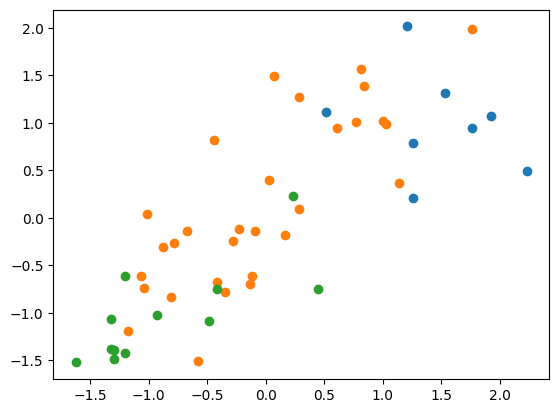

In [34]:
plt.scatter(df['Murder'][dbscan.labels_ == -1], df['Assault'][dbscan.labels_ == -1])
plt.scatter(df['Murder'][dbscan.labels_ == 0], df['Assault'][dbscan.labels_ == 0])
plt.scatter(df['Murder'][dbscan.labels_ == 1], df['Assault'][dbscan.labels_ == 1])